# Initial import of packages and metadata

In [1]:
import pandas as pd

metadata_file_directory = '../data/raw/maestro/maestro-v3.0.0/maestro-v3.0.0.csv'
maestro_metadata_df = pd.read_csv(metadata_file_directory)

## Split data overview

In [2]:
total_of_files = len(maestro_metadata_df)
split_dictionary = maestro_metadata_df.groupby('split').size().to_dict()
total_train, total_validation, total_test = split_dictionary['train'], split_dictionary['validation'], split_dictionary['test']

def format_total_output(sample: int, total: int) -> str:
    return str(sample) + ' (' + str(round(sample/total*100, 2)) + '%)'

print('Total of files: ' + str(total_of_files))
print('Total of train: ' + format_total_output(total_train, total_of_files))
print('Total of validation: ' + format_total_output(total_validation, total_of_files))
print('Total of test: ' + format_total_output(total_test, total_of_files))

Total of files: 1276
Total of train: 962 (75.39%)
Total of validation: 137 (10.74%)
Total of test: 177 (13.87%)


## Amount of files per year

In [3]:
maestro_metadata_df.groupby('year').size()

year
2004    132
2006    115
2008    147
2009    125
2011    163
2013    127
2014    105
2015    129
2017    140
2018     93
dtype: int64

## Piece duration distribution

count    1276.000000
mean      560.463595
std       443.057431
min        45.155208
25%       261.981576
50%       429.168241
75%       685.018817
max      2624.663508
Name: duration, dtype: float64


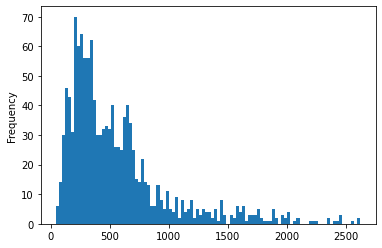

In [4]:
maestro_metadata_df['duration'].plot(kind='hist', bins=100)
print(maestro_metadata_df['duration'].describe())

It's easy to visualize that most of the data is between 1 and 10 minutes, having some outliers of 45 seconds on one side and outliers over 40 minutes on the other side.

In [5]:
# First 10 results of dataset
maestro_metadata_df.head(10)

,canonical_composer,canonical_title,split,year,midi_filename,audio_filename,duration
0,Alban Berg,Sonata Op. 1,train,2018,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,2018/MIDI-Unprocessed_Chamber3_MID--AUDIO_10_R...,698.661160
1,Alban Berg,Sonata Op. 1,train,2008,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,2008/MIDI-Unprocessed_03_R2_2008_01-03_ORIG_MI...,759.518471
2,Alban Berg,Sonata Op. 1,train,2017,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,2017/MIDI-Unprocessed_066_PIANO066_MID--AUDIO-...,464.649433
3,Alexander Scriabin,"24 Preludes Op. 11, No. 13-24",train,2004,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,2004/MIDI-Unprocessed_XP_21_R1_2004_01_ORIG_MI...,872.640588
4,Alexander Scriabin,"3 Etudes, Op. 65",validation,2006,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,2006/MIDI-Unprocessed_17_R1_2006_01-06_ORIG_MI...,397.857508
...,...,...,...,...,...,...,...
1271,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",test,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,241.470442
1272,Wolfgang Amadeus Mozart,"Sonata in F Major, K280",train,2004,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,2004/MIDI-Unprocessed_XP_14_R1_2004_04_ORIG_MI...,114.696243
1273,Wolfgang Amadeus Mozart,"Sonata in F Major, K533",validation,2004,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,2004/MIDI-Unprocessed_SMF_12_01_2004_01-05_ORI...,1139.198478
1274,Wolfgang Amadeus Mozart,"Sonata in F Major, K533/K494",validation,2018,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,2018/MIDI-Unprocessed_Recital17-19_MID--AUDIO_...,1068.751602
